In [7]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
import math
import os
from datetime import date, timedelta, datetime
import time
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
start_time = time.perf_counter()

In [8]:
# z = pd.read_excel('datacapmix.xlsx')
# vol = z[['Date','Large']]
# vol['Date'] = pd.to_datetime(vol['Date'])
# vol

# z = pd.read_excel('datacapmix.xlsx')
# alpha = z[['Date','Small']]
# alpha['Date'] = pd.to_datetime(alpha['Date'])
# alpha

In [9]:
alpha = pd.read_csv('Mom200.csv')
vol = pd.read_csv('Qual200.csv')

# alpha = pd.read_csv('500.csv')
# vol = pd.read_csv('EQ.csv')

In [10]:
# # Preprocess
# alpha['Date'] = pd.to_datetime(alpha['Date'])
# vol['Date'] = pd.to_datetime(vol['Date'])

# alpha.set_index('Date', inplace=True)
# vol.set_index('Date', inplace=True)

# # Align NAVs
# combined = pd.DataFrame({
#     'Alpha_NAV': alpha['Close'],
#     'Vol_NAV': vol['Close']
# }).dropna()

# # Rolling returns
# combined['Alpha_1Y_Return'] = combined['Alpha_NAV'].pct_change(252)
# combined['Vol_1Y_Return'] = combined['Vol_NAV'].pct_change(252)

# # Spread and Smoothing
# combined['Spread'] = combined['Alpha_1Y_Return'] - combined['Vol_1Y_Return']
# combined['Smoothed_Spread'] = combined['Spread'].rolling(22).mean()

# # Add percentiles
# combined['P20'] = combined['Smoothed_Spread'].expanding().quantile(0.20)
# combined['P50'] = combined['Smoothed_Spread'].expanding().quantile(0.50)
# combined['P90'] = combined['Smoothed_Spread'].expanding().quantile(0.90)

# # Drop NaNs
# combined = combined.dropna(subset=['Smoothed_Spread', 'P20', 'P50', 'P90'])

# # Define signals
# fall_below_95 = (combined['Smoothed_Spread'] < combined['P90']) & (combined['Smoothed_Spread'].shift(1) >= combined['P90'])
# rise_above_20 = (combined['Smoothed_Spread'] > combined['P20']) & (combined['Smoothed_Spread'].shift(1) <= combined['P20'])
# rise_above_50 = (combined['Smoothed_Spread'] > combined['P50']) & (combined['Smoothed_Spread'].shift(1) <= combined['P50'])

# # Dates
# fall_below_95_dates = combined.index[fall_below_95]
# rise_above_20_dates = combined.index[rise_above_20]
# rise_above_50_dates = combined.index[rise_above_50]

# # Plot
# fig, ax = plt.subplots(figsize=(14, 7))

# # Lines
# ax.plot(combined.index, combined['Smoothed_Spread'], label='Smoothed Spread', color='blue')
# ax.plot(combined.index, combined['P20'], label='20th Percentile', linestyle='dashed', color='orange')
# ax.plot(combined.index, combined['P50'], label='50th Percentile', linestyle='dashed', color='purple')
# ax.plot(combined.index, combined['P90'], label='90th Percentile', linestyle='dashed', color='green')
# ax.axhline(0, color='black', linewidth=1, linestyle='dotted')

# # Scatter markers
# ax.scatter(fall_below_95_dates, combined.loc[fall_below_95_dates, 'Smoothed_Spread'],
#            color='red', marker='v', s=100, label='Fall below 95th')

# ax.scatter(rise_above_20_dates, combined.loc[rise_above_20_dates, 'Smoothed_Spread'],
#            color='orange', marker='^', s=100, label='Rise above 20th')

# ax.scatter(rise_above_50_dates, combined.loc[rise_above_50_dates, 'Smoothed_Spread'],
#            color='purple', marker='^', s=100, label='Rise above 50th')

# # Optional: Annotations (you can comment out if too crowded)
# for idx in rise_above_20_dates:
#     ax.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, combined.loc[idx, 'Smoothed_Spread']),
#                 xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8, color='orange')

# for idx in rise_above_50_dates:
#     ax.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, combined.loc[idx, 'Smoothed_Spread']),
#                 xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8, color='purple')

# # Titles and labels
# ax.legend()
# ax.set_title('NIFTY200 MOM VS QUAL — Key Percentile Rises and Falls')
# ax.set_xlabel('Date')
# ax.set_ylabel('Spread')

# plt.show()

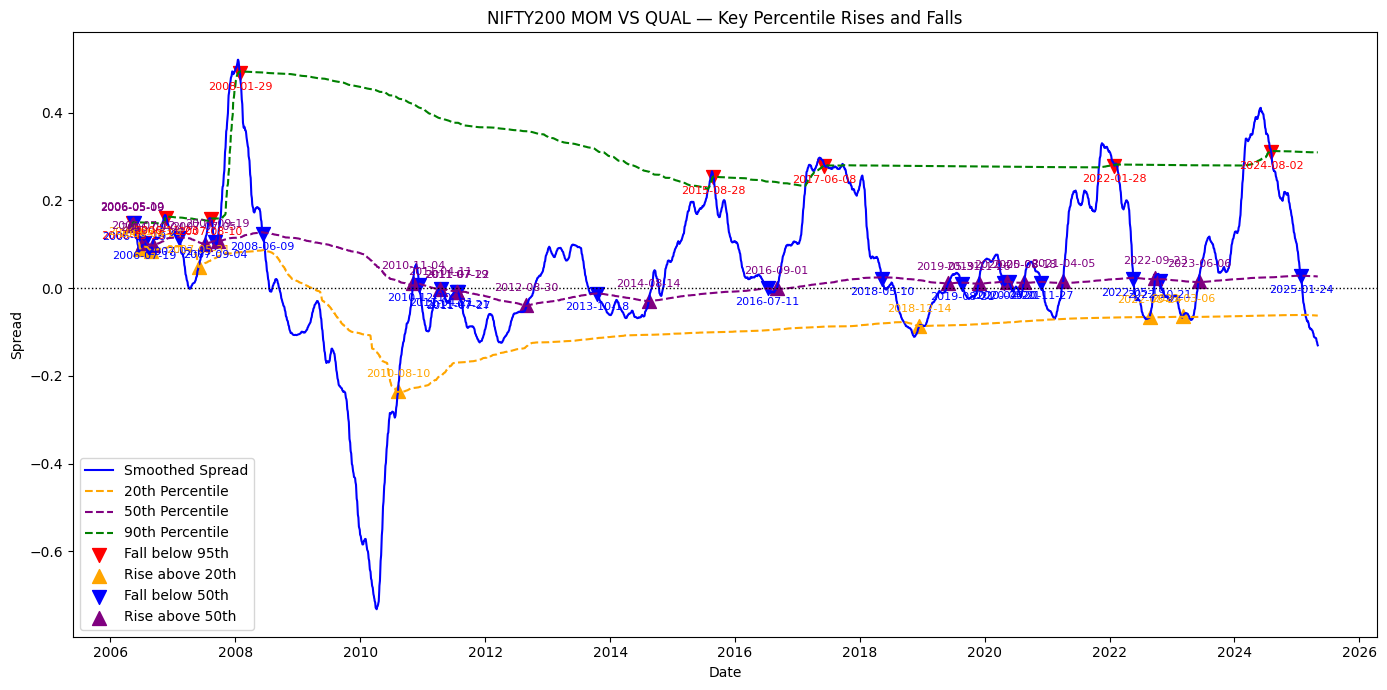

,Date,Smoothed_Spread,Signal
0,2006-05-09,0.143855,Rise above 50th
1,2006-05-09,0.143855,Rise above 20th
2,2006-05-10,0.145526,Rise above 50th
3,2006-05-15,0.148984,Fall below 95th
4,2006-05-19,0.147949,Fall below 50th
5,2006-06-23,0.090267,Rise above 20th
6,2006-07-12,0.103967,Rise above 50th
7,2006-07-19,0.103802,Fall below 50th
8,2006-08-24,0.085527,Rise above 20th
9,2006-09-04,0.099169,Rise above 50th


In [11]:
# expanding percentiles


alpha['Date'] = pd.to_datetime(alpha['Date'])
vol['Date'] = pd.to_datetime(vol['Date'])

alpha.set_index('Date', inplace=True)
vol.set_index('Date', inplace=True)

# Align NAVs
combined = pd.DataFrame({
    'Alpha_NAV': alpha['Close'],
    'Vol_NAV': vol['Close']
}).dropna()

# Rolling returns
combined['Alpha_1Y_Return'] = combined['Alpha_NAV'].pct_change(252)
combined['Vol_1Y_Return'] = combined['Vol_NAV'].pct_change(252)

# Spread and Smoothing
combined['Spread'] = combined['Alpha_1Y_Return'] - combined['Vol_1Y_Return']
combined['Smoothed_Spread'] = combined['Spread'].rolling(22).mean()

# Add percentiles
combined['P20'] = combined['Smoothed_Spread'].expanding().quantile(0.20)
combined['P50'] = combined['Smoothed_Spread'].expanding().quantile(0.50)
combined['P90'] = combined['Smoothed_Spread'].expanding().quantile(0.95)

# Drop NaNs
combined = combined.dropna(subset=['Smoothed_Spread', 'P20', 'P50', 'P90'])

# Define signal conditions
fall_below_95 = (combined['Smoothed_Spread'] < combined['P90']) & (combined['Smoothed_Spread'].shift(1) >= combined['P90'])
rise_above_20 = (combined['Smoothed_Spread'] > combined['P20']) & (combined['Smoothed_Spread'].shift(1) <= combined['P20'])
fall_below_50 = (combined['Smoothed_Spread'] < combined['P50']) & (combined['Smoothed_Spread'].shift(1) >= combined['P50'])
rise_above_50 = (combined['Smoothed_Spread'] > combined['P50']) & (combined['Smoothed_Spread'].shift(1) <= combined['P50'])

# Extract dates
fall_below_95_dates = combined.index[fall_below_95]
rise_above_20_dates = combined.index[rise_above_20]
fall_below_50_dates = combined.index[fall_below_50]
rise_above_50_dates = combined.index[rise_above_50]

# Signal DataFrame
signals_df = pd.DataFrame({
    'Date': (
        list(fall_below_95_dates) +
        list(rise_above_20_dates) +
        list(fall_below_50_dates) +
        list(rise_above_50_dates)
    ),
    'Smoothed_Spread': (
        list(combined.loc[fall_below_95_dates, 'Smoothed_Spread']) +
        list(combined.loc[rise_above_20_dates, 'Smoothed_Spread']) +
        list(combined.loc[fall_below_50_dates, 'Smoothed_Spread']) +
        list(combined.loc[rise_above_50_dates, 'Smoothed_Spread'])
    ),
    'Signal': (
        ['Fall below 95th'] * len(fall_below_95_dates) +
        ['Rise above 20th'] * len(rise_above_20_dates) +
        ['Fall below 50th'] * len(fall_below_50_dates) +
        ['Rise above 50th'] * len(rise_above_50_dates)
    )
})

# Sort and filter repeated signals
signals_df.sort_values('Date', inplace=True)
signals_df.reset_index(drop=True, inplace=True)
signals_df['Prev_Signal'] = signals_df['Signal'].shift(1)
signals_df = signals_df[signals_df['Signal'] != signals_df['Prev_Signal']].drop(columns='Prev_Signal')
signals_df.reset_index(drop=True, inplace=True)

# Final signal dates per type
fall_below_95_dates = signals_df[signals_df['Signal'] == 'Fall below 95th']['Date']
rise_above_20_dates = signals_df[signals_df['Signal'] == 'Rise above 20th']['Date']
fall_below_50_dates = signals_df[signals_df['Signal'] == 'Fall below 50th']['Date']
rise_above_50_dates = signals_df[signals_df['Signal'] == 'Rise above 50th']['Date']

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# Lines
ax.plot(combined.index, combined['Smoothed_Spread'], label='Smoothed Spread', color='blue')
ax.plot(combined.index, combined['P20'], label='20th Percentile', linestyle='dashed', color='orange')
ax.plot(combined.index, combined['P50'], label='50th Percentile', linestyle='dashed', color='purple')
ax.plot(combined.index, combined['P90'], label='90th Percentile', linestyle='dashed', color='green')
ax.axhline(0, color='black', linewidth=1, linestyle='dotted')

# Scatter markers
ax.scatter(fall_below_95_dates, combined.loc[fall_below_95_dates, 'Smoothed_Spread'],
           color='red', marker='v', s=100, label='Fall below 95th')
ax.scatter(rise_above_20_dates, combined.loc[rise_above_20_dates, 'Smoothed_Spread'],
           color='orange', marker='^', s=100, label='Rise above 20th')
ax.scatter(fall_below_50_dates, combined.loc[fall_below_50_dates, 'Smoothed_Spread'],
           color='blue', marker='v', s=100, label='Fall below 50th')
ax.scatter(rise_above_50_dates, combined.loc[rise_above_50_dates, 'Smoothed_Spread'],
           color='purple', marker='^', s=100, label='Rise above 50th')

# Annotations
for idx in signals_df['Date']:
    y = combined.loc[idx, 'Smoothed_Spread']
    label = signals_df[signals_df['Date'] == idx]['Signal'].values[0]
    color = {
        'Fall below 95th': 'red',
        'Rise above 20th': 'orange',
        'Fall below 50th': 'blue',
        'Rise above 50th': 'purple'
    }[label]
    offset = 10 if "Rise" in label else -12
    ax.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, y),
                xytext=(0, offset), textcoords='offset points',
                ha='center', fontsize=8, color=color)

# Titles and labels
ax.legend()
ax.set_title('NIFTY200 MOM VS QUAL — Key Percentile Rises and Falls')
ax.set_xlabel('Date')
ax.set_ylabel('Spread')

plt.tight_layout()
plt.show()

# Display filtered signals
signals_df

In [15]:
# ###rolling percentiles

# # Preprocess
# alpha['Date'] = pd.to_datetime(alpha['Date'])
# vol['Date'] = pd.to_datetime(vol['Date'])

# alpha.set_index('Date', inplace=True)
# vol.set_index('Date', inplace=True)

# # Align NAVs
# combined = pd.DataFrame({
#     'Alpha_NAV': alpha['Close'],
#     'Vol_NAV': vol['Close']
# }).dropna()

# # Rolling returns
# combined['Alpha_1Y_Return'] = combined['Alpha_NAV'].pct_change(252)
# combined['Vol_1Y_Return'] = combined['Vol_NAV'].pct_change(252)

# # Spread and Smoothing
# combined['Spread'] = combined['Alpha_1Y_Return'] - combined['Vol_1Y_Return']
# combined['Smoothed_Spread'] = combined['Spread'].rolling(22).mean()

# # Rolling percentiles (1-year window)
# window = 252*3
# combined['P20'] = combined['Smoothed_Spread'].rolling(window).apply(lambda x: pd.Series(x).quantile(0.20), raw=False)
# combined['P50'] = combined['Smoothed_Spread'].rolling(window).apply(lambda x: pd.Series(x).quantile(0.50), raw=False)
# combined['P90'] = combined['Smoothed_Spread'].rolling(window).apply(lambda x: pd.Series(x).quantile(0.95), raw=False)

# # Drop NaNs
# combined = combined.dropna(subset=['Smoothed_Spread', 'P20', 'P50', 'P90'])

# # Define signal conditions
# fall_below_95 = (combined['Smoothed_Spread'] < combined['P90']) & (combined['Smoothed_Spread'].shift(1) >= combined['P90'])
# rise_above_20 = (combined['Smoothed_Spread'] > combined['P20']) & (combined['Smoothed_Spread'].shift(1) <= combined['P20'])
# fall_below_50 = (combined['Smoothed_Spread'] < combined['P50']) & (combined['Smoothed_Spread'].shift(1) >= combined['P50'])
# rise_above_50 = (combined['Smoothed_Spread'] > combined['P50']) & (combined['Smoothed_Spread'].shift(1) <= combined['P50'])

# # Extract dates
# fall_below_95_dates = combined.index[fall_below_95]
# rise_above_20_dates = combined.index[rise_above_20]
# fall_below_50_dates = combined.index[fall_below_50]
# rise_above_50_dates = combined.index[rise_above_50]

# # Signal DataFrame
# signals_df = pd.DataFrame({
#     'Date': (
#         list(fall_below_95_dates) +
#         list(rise_above_20_dates) +
#         list(fall_below_50_dates) +
#         list(rise_above_50_dates)
#     ),
#     'Smoothed_Spread': (
#         list(combined.loc[fall_below_95_dates, 'Smoothed_Spread']) +
#         list(combined.loc[rise_above_20_dates, 'Smoothed_Spread']) +
#         list(combined.loc[fall_below_50_dates, 'Smoothed_Spread']) +
#         list(combined.loc[rise_above_50_dates, 'Smoothed_Spread'])
#     ),
#     'Signal': (
#         ['Fall below 95th'] * len(fall_below_95_dates) +
#         ['Rise above 20th'] * len(rise_above_20_dates) +
#         ['Fall below 50th'] * len(fall_below_50_dates) +
#         ['Rise above 50th'] * len(rise_above_50_dates)
#     )
# })

# # Sort and filter repeated signals
# signals_df.sort_values('Date', inplace=True)
# signals_df.reset_index(drop=True, inplace=True)
# signals_df['Prev_Signal'] = signals_df['Signal'].shift(1)
# signals_df = signals_df[signals_df['Signal'] != signals_df['Prev_Signal']].drop(columns='Prev_Signal')
# signals_df.reset_index(drop=True, inplace=True)

# # Final signal dates per type
# fall_below_95_dates = signals_df[signals_df['Signal'] == 'Fall below 95th']['Date']
# rise_above_20_dates = signals_df[signals_df['Signal'] == 'Rise above 20th']['Date']
# fall_below_50_dates = signals_df[signals_df['Signal'] == 'Fall below 50th']['Date']
# rise_above_50_dates = signals_df[signals_df['Signal'] == 'Rise above 50th']['Date']

# # Plot
# fig, ax = plt.subplots(figsize=(14, 7))

# # Lines
# ax.plot(combined.index, combined['Smoothed_Spread'], label='Smoothed Spread', color='blue')
# ax.plot(combined.index, combined['P20'], label='20th Percentile (1Y)', linestyle='dashed', color='orange')
# ax.plot(combined.index, combined['P50'], label='50th Percentile (1Y)', linestyle='dashed', color='purple')
# ax.plot(combined.index, combined['P90'], label='90th Percentile (1Y)', linestyle='dashed', color='green')
# ax.axhline(0, color='black', linewidth=1, linestyle='dotted')

# # Scatter markers
# ax.scatter(fall_below_95_dates, combined.loc[fall_below_95_dates, 'Smoothed_Spread'],
#            color='red', marker='v', s=100, label='Fall below 95th')
# ax.scatter(rise_above_20_dates, combined.loc[rise_above_20_dates, 'Smoothed_Spread'],
#            color='orange', marker='^', s=100, label='Rise above 20th')
# ax.scatter(fall_below_50_dates, combined.loc[fall_below_50_dates, 'Smoothed_Spread'],
#            color='blue', marker='v', s=100, label='Fall below 50th')
# ax.scatter(rise_above_50_dates, combined.loc[rise_above_50_dates, 'Smoothed_Spread'],
#            color='purple', marker='^', s=100, label='Rise above 50th')

# # Annotations
# for idx in signals_df['Date']:
#     y = combined.loc[idx, 'Smoothed_Spread']
#     label = signals_df[signals_df['Date'] == idx]['Signal'].values[0]
#     color = {
#         'Fall below 95th': 'red',
#         'Rise above 20th': 'orange',
#         'Fall below 50th': 'blue',
#         'Rise above 50th': 'purple'
#     }[label]
#     offset = 10 if "Rise" in label else -12
#     ax.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, y),
#                 xytext=(0, offset), textcoords='offset points',
#                 ha='center', fontsize=8, color=color)

# # Titles and labels
# ax.legend()
# ax.set_title('NIFTY200 MOM VS QUAL — Key Percentile Rises and Falls (1Y Rolling Percentiles)')
# ax.set_xlabel('Date')
# ax.set_ylabel('Spread')

# plt.tight_layout()
# plt.show()

# # Display filtered signals
# signals_df

In [12]:
signals_df = signals_df.iloc[14:].reset_index(drop=True)
signals_df

,Date,Smoothed_Spread,Signal
0,2007-08-10,0.158644,Fall below 95th
1,2007-09-04,0.105956,Fall below 50th
2,2007-09-19,0.107827,Rise above 50th
3,2008-01-29,0.489467,Fall below 95th
4,2008-06-09,0.124430,Fall below 50th
5,2010-08-10,-0.233641,Rise above 20th
6,2010-11-04,0.012055,Rise above 50th
7,2010-12-10,0.007775,Fall below 50th
8,2011-04-11,-0.002451,Rise above 50th
9,2011-04-21,-0.002701,Fall below 50th


In [13]:
# Initialize filtered list with the first row
filtered_signals = [signals_df.iloc[0]]

# Iterate through signals from the second row
for i in range(1, len(signals_df)):
    current = signals_df.iloc[i]
    previous = filtered_signals[-1]

    # Rule: after 'Rise above 20th', only allow 'Fall below 95th'
    if previous['Signal'] == 'Rise above 20th':
        if current['Signal'] == 'Fall below 95th':
            filtered_signals.append(current)

    # Normal de-duplication: skip consecutive same signals
    elif current['Signal'] != previous['Signal']:
        filtered_signals.append(current)

# Create the final filtered DataFrame
filtered_signals_df = pd.DataFrame(filtered_signals).reset_index(drop=True)

filtered_signals_df

,Date,Smoothed_Spread,Signal
0,2007-08-10,0.158644,Fall below 95th
1,2007-09-04,0.105956,Fall below 50th
2,2007-09-19,0.107827,Rise above 50th
3,2008-01-29,0.489467,Fall below 95th
4,2008-06-09,0.124430,Fall below 50th
5,2010-08-10,-0.233641,Rise above 20th
6,2015-08-28,0.252712,Fall below 95th
7,2016-07-11,-0.000884,Fall below 50th
8,2016-09-01,-0.000583,Rise above 50th
9,2017-06-08,0.278735,Fall below 95th


In [101]:
filtered_signals_df.to_csv('Signalstosend.csv', index=False)

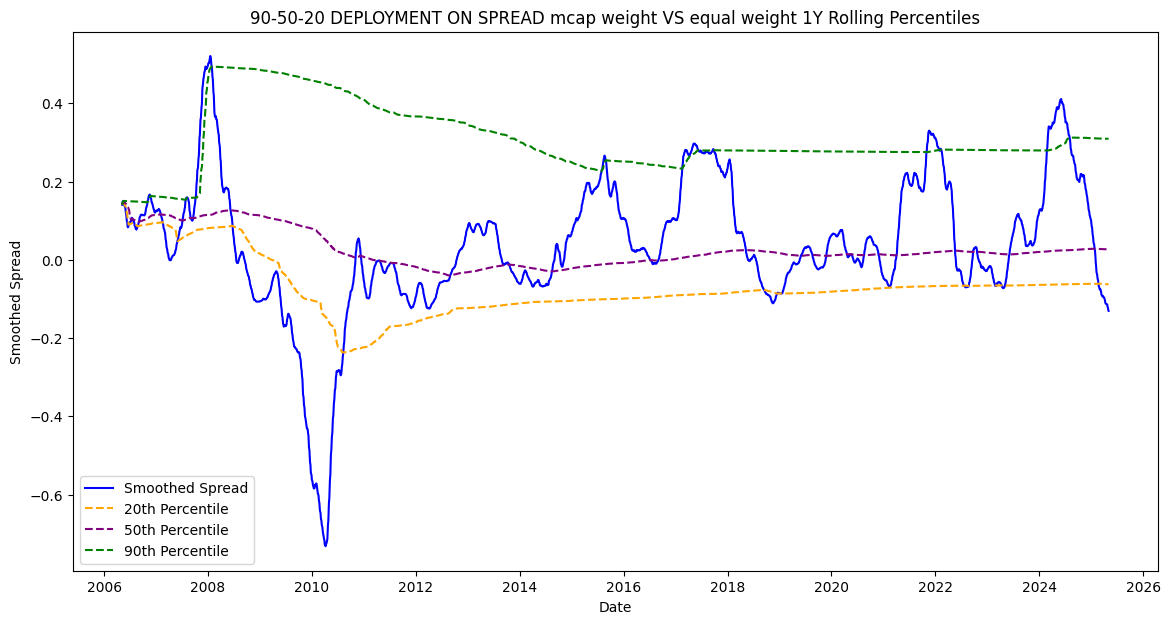

In [ ]:
# # Plot
# fig, ax = plt.subplots(figsize=(14, 7))

# # Main line and percentiles
# ax.plot(combined.index, combined['Smoothed_Spread'], label='Smoothed Spread', color='blue')
# ax.plot(combined.index, combined['P20'], label='20th Percentile', linestyle='dashed', color='orange')
# ax.plot(combined.index, combined['P50'], label='50th Percentile', linestyle='dashed', color='purple')
# ax.plot(combined.index, combined['P90'], label='90th Percentile', linestyle='dashed', color='green')
# # ax.axhline(0, color='black', linewidth=1, linestyle='dotted')

# # # Scatter markers by signal type
# # for _, row in filtered_signals_df.iterrows():
# #     if row['Signal'] == 'Fall below 95th':
# #         ax.scatter(row['Date'], row['Smoothed_Spread'], color='red', marker='v', s=100, label='Fall below 95th')
# #         ax.annotate(row['Date'].strftime('%Y-%m-%d'), xy=(row['Date'], row['Smoothed_Spread']),
# #                     xytext=(0, -12), textcoords='offset points', ha='center', fontsize=8, color='red')
# #     elif row['Signal'] == 'Rise above 20th':
# #         ax.scatter(row['Date'], row['Smoothed_Spread'], color='orange', marker='^', s=100, label='Rise above 20th')
# #         ax.annotate(row['Date'].strftime('%Y-%m-%d'), xy=(row['Date'], row['Smoothed_Spread']),
# #                     xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8, color='orange')
# #     elif row['Signal'] == 'Fall below 50th':
# #         ax.scatter(row['Date'], row['Smoothed_Spread'], color='blue', marker='v', s=100, label='Fall below 50th')
# #         ax.annotate(row['Date'].strftime('%Y-%m-%d'), xy=(row['Date'], row['Smoothed_Spread']),
# #                     xytext=(0, -12), textcoords='offset points', ha='center', fontsize=8, color='blue')

# # Deduplicate legend labels
# handles, labels = ax.get_legend_handles_labels()
# unique_labels = dict(zip(labels, handles))
# ax.legend(unique_labels.values(), unique_labels.keys())

# # Final labels and display
# ax.set_title('90-50-20 DEPLOYMENT ON SPREAD mcap weight VS equal weight 1Y Rolling Percentiles')
# ax.set_xlabel('Date')
# ax.set_ylabel('Smoothed Spread')
# plt.show()


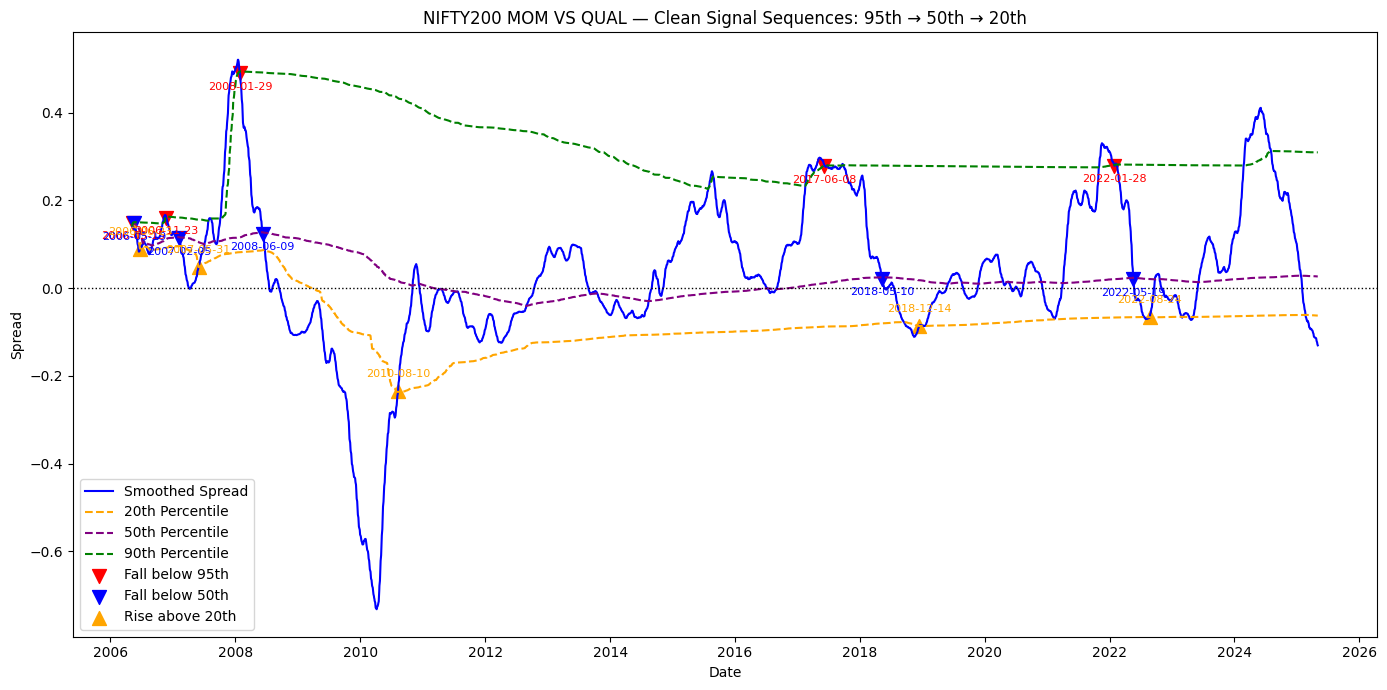

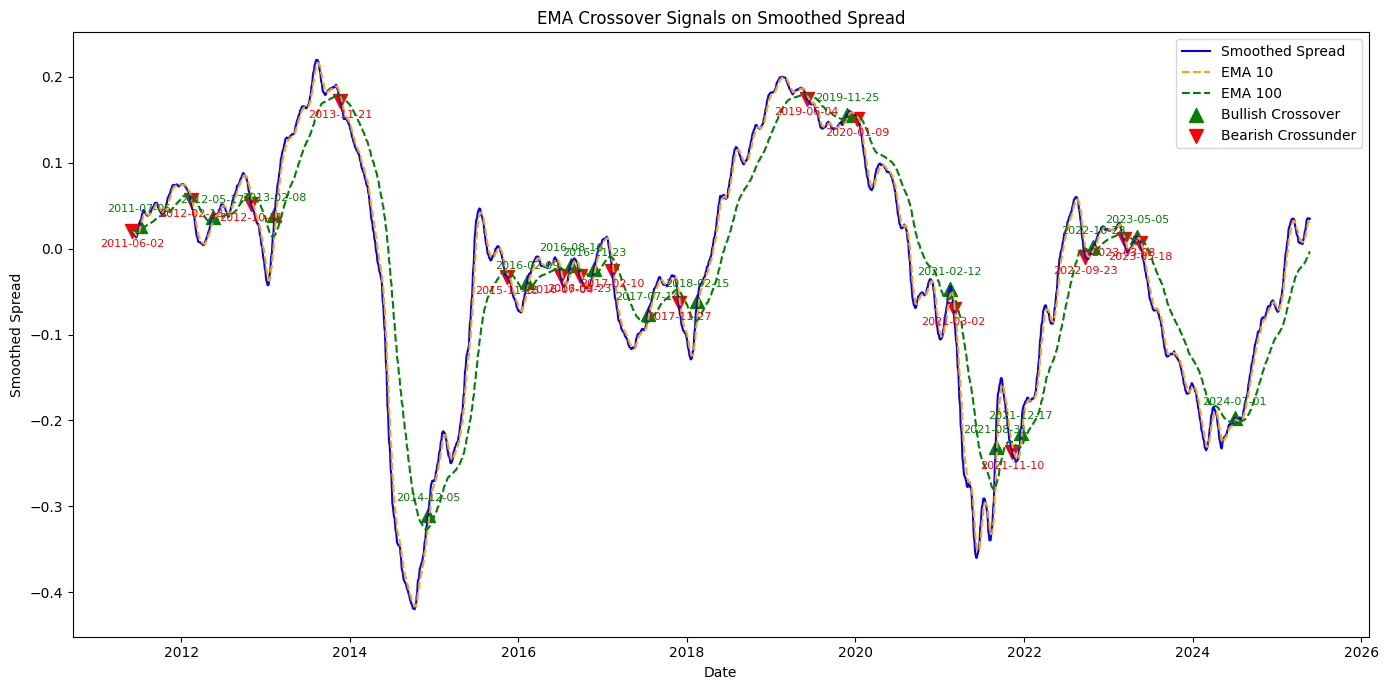

In [46]:
# Calculate EMAs
combined['EMA_10'] = combined['Smoothed_Spread'].ewm(span=10, adjust=False).mean()
combined['EMA_100'] = combined['Smoothed_Spread'].ewm(span=100, adjust=False).mean()

# Define crossover signals
cross_over = (combined['EMA_10'] > combined['EMA_100']) & (combined['EMA_10'].shift(1) <= combined['EMA_100'].shift(1))
cross_under = (combined['EMA_10'] < combined['EMA_100']) & (combined['EMA_10'].shift(1) >= combined['EMA_100'].shift(1))

# Extract crossover dates
cross_over_dates = combined.index[cross_over]
cross_under_dates = combined.index[cross_under]

# Create signals DataFrame
signals_df = pd.DataFrame({
    'Date': list(cross_over_dates) + list(cross_under_dates),
    'Signal': ['Bullish Crossover'] * len(cross_over_dates) + ['Bearish Crossunder'] * len(cross_under_dates),
    'Smoothed_Spread': list(combined.loc[cross_over_dates, 'Smoothed_Spread']) + list(combined.loc[cross_under_dates, 'Smoothed_Spread'])
})

# Sort and reset index
signals_df.sort_values('Date', inplace=True)
signals_df.reset_index(drop=True, inplace=True)

# Final signal dates per type
bullish_dates = signals_df[signals_df['Signal'] == 'Bullish Crossover']['Date']
bearish_dates = signals_df[signals_df['Signal'] == 'Bearish Crossunder']['Date']



fig, ax = plt.subplots(figsize=(14, 7))

# Plot Smoothed Spread and EMAs
ax.plot(combined.index, combined['Smoothed_Spread'], label='Smoothed Spread', color='blue')
ax.plot(combined.index, combined['EMA_10'], label='EMA 10', linestyle='--', color='orange')
ax.plot(combined.index, combined['EMA_100'], label='EMA 100', linestyle='--', color='green')

# Crossover markers
ax.scatter(bullish_dates, combined.loc[bullish_dates, 'Smoothed_Spread'],
           color='green', marker='^', s=100, label='Bullish Crossover')
ax.scatter(bearish_dates, combined.loc[bearish_dates, 'Smoothed_Spread'],
           color='red', marker='v', s=100, label='Bearish Crossunder')

# Annotate signals
for idx in signals_df['Date']:
    y = combined.loc[idx, 'Smoothed_Spread']
    label = signals_df[signals_df['Date'] == idx]['Signal'].values[0]
    offset = 10 if "Bullish" in label else -12
    color = 'green' if "Bullish" in label else 'red'
    ax.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, y),
                xytext=(0, offset), textcoords='offset points',
                ha='center', fontsize=8, color=color)

# Labels and legend
ax.legend()
ax.set_title('EMA Crossover Signals on Smoothed Spread')
ax.set_xlabel('Date')
ax.set_ylabel('Smoothed Spread')
plt.tight_layout()
plt.show()